<a href="https://colab.research.google.com/github/Samar-Agarwal/Detecting-Depression-through-Tweets/blob/main/wids_nlp_week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Winter In Data Science (WIDS) Project <br>
# Topic : Detecting depression through tweets

# Task 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import string
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df = pd.read_csv("drive/MyDrive/WIDS_NLP_Project/dataset2.csv", on_bad_lines = 'skip')

In [ ]:
df.head()

,ItemID,Sentiment,SentimentSource,SentimentText
0,1,0,Sentiment140,is so sad for my APL frie...
1,2,0,Sentiment140,I missed the New Moon trail...
2,3,1,Sentiment140,omg its already 7:30 :O
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...


In [ ]:
df.isnull().sum()

ItemID             0
Sentiment          0
SentimentSource    0
SentimentText      0
dtype: int64

# Task 2 : Text Pre Processing

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
df = df.drop(columns = ['SentimentSource'])

In [ ]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df['rm_pct_Text']= df['SentimentText'].apply(lambda x:remove_punctuation(x))
df.head()

,ItemID,Sentiment,SentimentText,rm_pct_Text
0,1,0,is so sad for my APL friend.............,is so sad for my APL friend
1,2,0,I missed the New Moon trailer...,I missed the New Moon trailer
2,3,1,omg its already 7:30 :O,omg its already 730 O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...,Omgaga Im sooo im gunna CRy Ive been at this dentist since 11 I was suposed 2 just get a crown put on 30mins
4,5,0,i think mi bf is cheating on me!!! T_T,i think mi bf is cheating on me TT


In [ ]:
# #defining the function to remove url
# def remove_url(text):
#     punctuationfree="".join([i for i in text if i not in string.punctuation])
#     return punctuationfree
# #storing the puntuation free text
# df['SentimentText']= df['SentimentText'].apply(lambda x:remove_url(x))
# df.head()

In [ ]:
df['lower_Text'] = df['rm_pct_Text'].apply(lambda x: x.lower())

In [ ]:
#defining function for tokenization
def tokenization(text):
    tokens = re.split(r'\W+',text)
    return tokens
#applying function to the column
df['tokenized_Text']= df['lower_Text'].apply(lambda x: tokenization(x))

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
#applying the function
df['rm_stop_text']= df['tokenized_Text'].apply(lambda x:remove_stopwords(x))

In [ ]:
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:

#defining the object for stemming
porter_stemmer = PorterStemmer()
#defining a function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text
df['stem_text']=df['rm_stop_text'].apply(lambda x: stemming(x))

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
df['Lemm_text']=df['rm_stop_text'].apply(lambda x:lemmatizer(x))

# Task 3 : EDA

In [ ]:
import matplotlib.pyplot as plt


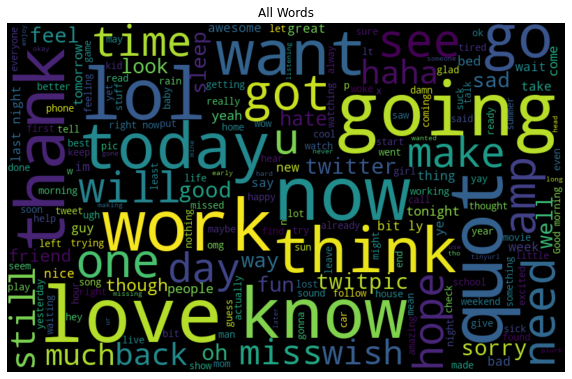

In [ ]:
from wordcloud import WordCloud

all_words =' '.join([text for text in df['SentimentText']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('All Words')
plt.show()


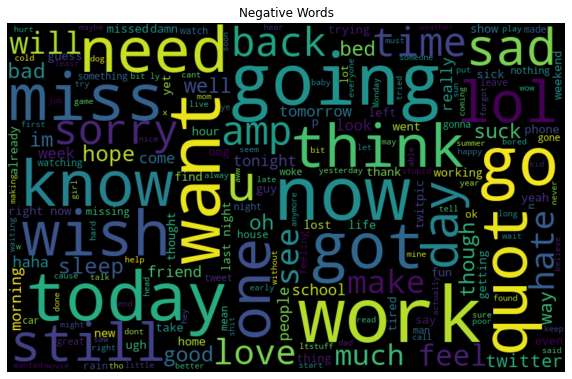

In [ ]:
normal_words =' '.join([text for text in df['SentimentText'][df['Sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Negative Words')
plt.show()

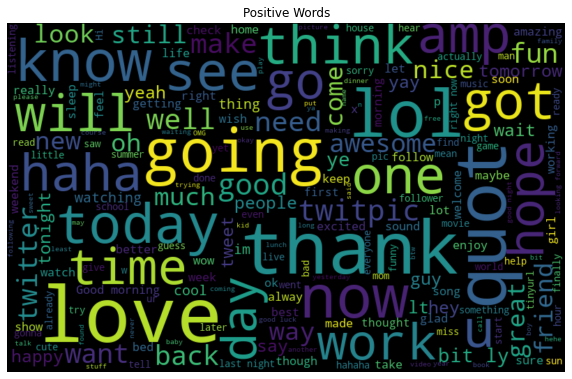

In [ ]:
dep_words =' '.join([text for text in df['SentimentText'][df['Sentiment'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(dep_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Positive Words')
plt.show()

Text(0.5, 0, 'tweet length')

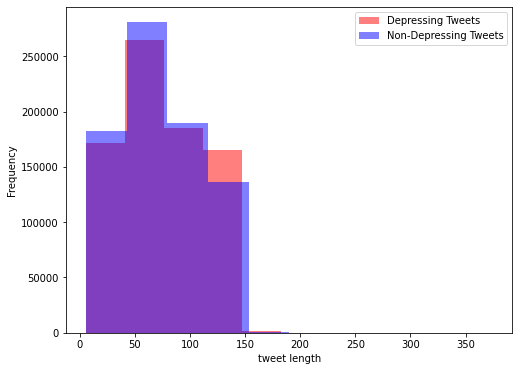

In [ ]:
df['SentimentText'][df['Sentiment']== 0].str.len().plot.hist(color = 'red', figsize = (8, 6),alpha=0.5)
df['SentimentText'][df['Sentiment']== 1].str.len().plot.hist(color = 'blue', figsize = (8, 6),alpha=0.5)
plt.legend(labels = ['Depressing Tweets','Non-Depressing Tweets'])
plt.xlabel('tweet length')

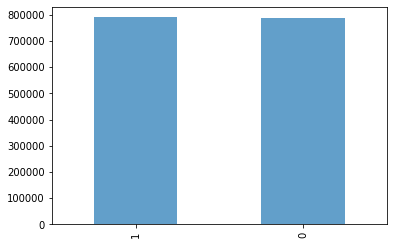

In [ ]:
df['Sentiment'].value_counts().plot.bar(alpha=0.7,figsize = (6, 4))

In [ ]:
df[df['Sentiment']==0].head()
# 5 depressing tweets

,ItemID,Sentiment,SentimentText,rm_pct_Text,lower_Text,tokenized_Text,rm_stop_text,stem_text,Lemm_text
0,1,0,is so sad for my APL friend.............,is so sad for my APL friend,is so sad for my apl friend,"[, is, so, sad, for, my, apl, friend]","[, sad, apl, friend]","[, sad, apl, friend]","[, sad, apl, friend]"
1,2,0,I missed the New Moon trailer...,I missed the New Moon trailer,i missed the new moon trailer,"[, i, missed, the, new, moon, trailer]","[, missed, new, moon, trailer]","[, miss, new, moon, trailer]","[, missed, new, moon, trailer]"
3,4,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...,Omgaga Im sooo im gunna CRy Ive been at this dentist since 11 I was suposed 2 just get a crown put on 30mins,omgaga im sooo im gunna cry ive been at this dentist since 11 i was suposed 2 just get a crown put on 30mins,"[, omgaga, im, sooo, im, gunna, cry, ive, been, at, this, dentist, since, 11, i, was, suposed, 2, just, get, a, crown, put, on, 30mins]","[, omgaga, im, sooo, im, gunna, cry, ive, dentist, since, 11, suposed, 2, get, crown, put, 30mins]","[, omgaga, im, sooo, im, gunna, cri, ive, dentist, sinc, 11, supos, 2, get, crown, put, 30min]","[, omgaga, im, sooo, im, gunna, cry, ive, dentist, since, 11, suposed, 2, get, crown, put, 30mins]"
4,5,0,i think mi bf is cheating on me!!! T_T,i think mi bf is cheating on me TT,i think mi bf is cheating on me tt,"[, i, think, mi, bf, is, cheating, on, me, tt]","[, think, mi, bf, cheating, tt]","[, think, mi, bf, cheat, tt]","[, think, mi, bf, cheating, tt]"
5,6,0,or i just worry too much?,or i just worry too much,or i just worry too much,"[, or, i, just, worry, too, much, ]","[, worry, much, ]","[, worri, much, ]","[, worry, much, ]"


In [ ]:
df[df['Sentiment']==1].head()
# 5 non-depressing tweets

,ItemID,Sentiment,SentimentText,rm_pct_Text,lower_Text,tokenized_Text,rm_stop_text,stem_text,Lemm_text
2,3,1,omg its already 7:30 :O,omg its already 730 O,omg its already 730 o,"[, omg, its, already, 730, o]","[, omg, already, 730]","[, omg, alreadi, 730]","[, omg, already, 730]"
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!,Juuuuuuuuuuuuuuuuussssst Chillin,juuuuuuuuuuuuuuuuussssst chillin,"[, juuuuuuuuuuuuuuuuussssst, chillin]","[, juuuuuuuuuuuuuuuuussssst, chillin]","[, juuuuuuuuuuuuuuuuussssst, chillin]","[, juuuuuuuuuuuuuuuuussssst, chillin]"
8,9,1,handed in my uniform today . i miss you already,handed in my uniform today i miss you already,handed in my uniform today i miss you already,"[, handed, in, my, uniform, today, i, miss, you, already]","[, handed, uniform, today, miss, already]","[, hand, uniform, today, miss, alreadi]","[, handed, uniform, today, miss, already]"
9,10,1,hmmmm.... i wonder how she my number @-),hmmmm i wonder how she my number,hmmmm i wonder how she my number,"[, hmmmm, i, wonder, how, she, my, number, ]","[, hmmmm, wonder, number, ]","[, hmmmm, wonder, number, ]","[, hmmmm, wonder, number, ]"
11,12,1,thanks to all the haters up in my face all day! 112-102,thanks to all the haters up in my face all day 112102,thanks to all the haters up in my face all day 112102,"[, thanks, to, all, the, haters, up, in, my, face, all, day, 112102]","[, thanks, haters, face, day, 112102]","[, thank, hater, face, day, 112102]","[, thanks, hater, face, day, 112102]"


In [ ]:
df['len']=df['SentimentText'].str.len()

In [ ]:
df0=df[df['Sentiment']==0]
display(df0[df0['len']==df0['len'].max()])
#longest depressing tweet

,ItemID,Sentiment,SentimentText,rm_pct_Text,lower_Text,tokenized_Text,rm_stop_text,stem_text,Lemm_text,len
396369,396382,0,@neospace à¹€à¸£à¸·à¹ˆà¸­à¸‡à¸•à¸±à¹‰à¸‡à¸žà¸£à¸£à¸„à¹€à¸„à¸£à¸² à¹€à¸«à¹‡à¸™à¸”à¹‰à¸§à¸¢à¸—à¸µà¹ˆà¹„à¸¡à¹ˆà¸•à¹‰à¸­à¸‡à¹„à¸›à¸™à¸±à¹ˆà¸‡à¹€à¹ˆà¸¥à¹ˆà¸™à¸?à¸²à¸£à¹€à¸¡à¸·à¸­à¸‡ &quot;à¸‚à¹‰à¸²à¸‡à¸–à¸™à¸™&quot; à¸?à¸±à¸™à¸­à¸µà¸? à¹?à¸•à¹ˆà¸—à¸µà¹ˆà¸¡à¸²à¸—à¸µà¹ˆà¹„à¸›à¹€à¸«à¹‡à¸™à¹?à¸¥à¹‰à¸§ à¸‚à¸±à¸”à¸•à¸²à¸¡à¸²à¸? à¸žà¸£à¸£à¸„à¹€à¸‚à¸µà¸¢à¸§ Green Party,neospace à¹€à¸£à¸·à¹ˆà¸­à¸‡à¸•à¸±à¹‰à¸‡à¸žà¸£à¸£à¸„à¹€à¸„à¸£à¸² à¹€à¸«à¹‡à¸™à¸”à¹‰à¸§à¸¢à¸—à¸µà¹ˆà¹„à¸¡à¹ˆà¸•à¹‰à¸­à¸‡à¹„à¸›à¸™à¸±à¹ˆà¸‡à¹€à¹ˆà¸¥à¹ˆà¸™à¸à¸²à¸£à¹€à¸¡à¸·à¸­à¸‡ quotà¸‚à¹‰à¸²à¸‡à¸–à¸™à¸™quot à¸à¸±à¸™à¸­à¸µà¸ à¹à¸•à¹ˆà¸—à¸µà¹ˆà¸¡à¸²à¸—à¸µà¹ˆà¹„à¸›à¹€à¸«à¹‡à¸™à¹à¸¥à¹‰à¸§ à¸‚à¸±à¸”à¸•à¸²à¸¡à¸²à¸ à¸žà¸£à¸£à¸„à¹€à¸‚à¸µà¸¢à¸§ Green Party,neospace à¹€à¸£à¸·à¹ˆà¸­à¸‡à¸•à¸±à¹‰à¸‡à¸žà¸£à¸£à¸„à¹€à¸„à¸£à¸² à¹€à¸«à¹‡à¸™à¸”à¹‰à¸§à¸¢à¸—à¸µà¹ˆà¹„à¸¡à¹ˆà¸•à¹‰à¸­à¸‡à¹„à¸›à¸™à¸±à¹ˆà¸‡à¹€à¹ˆà¸¥à¹ˆà¸™à¸à¸²à¸£à¹€à¸¡à¸·à¸­à¸‡ quotà¸‚à¹‰à¸²à¸‡à¸–à¸™à¸™quot à¸à¸±à¸™à¸­à¸µà¸ à¹à¸•à¹ˆà¸—à¸µà¹ˆà¸¡à¸²à¸—à¸µà¹ˆà¹„à¸›à¹€à¸«à¹‡à¸™à¹à¸¥à¹‰à¸§ à¸‚à¸±à¸”à¸•à¸²à¸¡à¸²à¸ à¸žà¸£à¸£à¸„à¹€à¸‚à¸µà¸¢à¸§ green party,"[neospace, à¹, à, à, à¹ˆà, à, à, à, à¹, à, à, žà, à, à, à¹, à, à, à, ², à¹, à, à¹, à, à, à¹, à, à, à, à, µà¹ˆà¹, à, à¹ˆà, à¹, à, à, à¹, à, à, à, à¹ˆà, à¹, à¹ˆà, à¹ˆà, à, à, ²à, à¹, à, à, à, à, quotà, à¹, à, ²à, à, à, à, quot, à, à, à, à, à, µà, à¹à, à¹ˆà, à, µà¹ˆà, à, ²à, à, µà¹ˆà¹, à, à¹, à, à¹, à, à¹à, à¹, à, à, à, à, à, à, ²à, à, ²à, à, žà, à, à, à¹, à, à, µà, à, green, party, ...]","[neospace, à¹, à, à, à¹ˆà, à, à, à, à¹, à, à, žà, à, à, à¹, à, à, à, ², à¹, à, à¹, à, à, à¹, à, à, à, à, µà¹ˆà¹, à, à¹ˆà, à¹, à, à, à¹, à, à, à, à¹ˆà, à¹, à¹ˆà, à¹ˆà, à, à, ²à, à¹, à, à, à, à, quotà, à¹, à, ²à, à, à, à, quot, à, à, à, à, à, µà, à¹à, à¹ˆà, à, µà¹ˆà, à, ²à, à, µà¹ˆà¹, à, à¹, à, à¹, à, à¹à, à¹, à, à, à, à, à, à, ²à, à, ²à, à, žà, à, à, à¹, à, à, µà, à, green, party, ...]","[neospac, à¹, à, à, à¹ˆà, à, à, à, à¹, à, à, žà, à, à, à¹, à, à, à, ², à¹, à, à¹, à, à, à¹, à, à, à, à, µà¹ˆà¹, à, à¹ˆà, à¹, à, à, à¹, à, à, à, à¹ˆà, à¹, à¹ˆà, à¹ˆà, à, à, ²à, à¹, à, à, à, à, quotà, à¹, à, ²à, à, à, à, quot, à, à, à, à, à, µà, à¹à, à¹ˆà, à, µà¹ˆà, à, ²à, à, µà¹ˆà¹, à, à¹, à, à¹, à, à¹à, à¹, à, à, à, à, à, à, ²à, à, ²à, à, žà, à, à, à¹, à, à, µà, à, green, parti, ...]","[neospace, à¹, à, à, à¹ˆà, à, à, à, à¹, à, à, žà, à, à, à¹, à, à, à, ², à¹, à, à¹, à, à, à¹, à, à, à, à, µà¹ˆà¹, à, à¹ˆà, à¹, à, à, à¹, à, à, à, à¹ˆà, à¹, à¹ˆà, à¹ˆà, à, à, ²à, à¹, à, à, à, à, quotà, à¹, à, ²à, à, à, à, quot, à, à, à, à, à, µà, à¹à, à¹ˆà, à, µà¹ˆà, à, ²à, à, µà¹ˆà¹, à, à¹, à, à¹, à, à¹à, à¹, à, à, à, à, à, à, ²à, à, ²à, à, žà, à, à, à¹, à, à, µà, à, green, party, ...]",359


In [ ]:
df1=df[df['Sentiment']==1]
display(df1[df1['len']==df1['len'].max()])
#longest non-depressing tweet

,ItemID,Sentiment,SentimentText,rm_pct_Text,lower_Text,tokenized_Text,rm_stop_text,stem_text,Lemm_text,len
122771,122784,1,@catfish_ohm à¹€à¸„à¹‰à¸²à¹ƒà¸«à¹‰à¸?à¸²à¸£à¹Œà¸•à¸¹à¸™à¸?à¸¸à¹‚à¸£à¸°(à¸ªà¸±à¸ªà¹†+à¸¢à¸¹à¸£à¸´à¹?à¸?à¹„à¸”à¹‰à¹?à¸—à¸™à¸™à¸°à¸žà¸­à¸”à¸µà¸¡à¸´à¹‚à¸?à¸°à¸«à¸§à¸‡(à¸‚à¸™à¸²à¸”à¹€à¸Ÿà¸´à¸™à¹?à¸?à¸¢à¸±à¸‡à¹€à¸„à¸¢à¹ƒà¸«à¹‰à¹„à¸¡à¹ˆà¹ƒà¸Šà¹ˆà¹€à¸«à¸£à¸­.à¹?à¸•à¹ˆà¸Šà¹ˆà¸²à¸‡à¹€à¸«à¸­à¸°à¸£à¸²à¸¢à¸™à¸±à¹‰à¸™à¹€à¸‚à¸²à¹‚à¸¡à¹€à¸­à¸°à¸?à¸§à¹ˆà¸²à¸›à¸¥à¸²à¹?à¸¡à¸§à¹€à¸¢à¸­à¸° =,catfishohm à¹€à¸„à¹‰à¸²à¹ƒà¸«à¹‰à¸à¸²à¸£à¹Œà¸•à¸¹à¸™à¸à¸¸à¹‚à¸£à¸°à¸ªà¸±à¸ªà¹†à¸¢à¸¹à¸£à¸´à¹à¸à¹„à¸”à¹‰à¹à¸—à¸™à¸™à¸°à¸žà¸­à¸”à¸µà¸¡à¸´à¹‚à¸à¸°à¸«à¸§à¸‡à¸‚à¸™à¸²à¸”à¹€à¸Ÿà¸´à¸™à¹à¸à¸¢à¸±à¸‡à¹€à¸„à¸¢à¹ƒà¸«à¹‰à¹„à¸¡à¹ˆà¹ƒà¸Šà¹ˆà¹€à¸«à¸£à¸­à¹à¸•à¹ˆà¸Šà¹ˆà¸²à¸‡à¹€à¸«à¸­à¸°à¸£à¸²à¸¢à¸™à¸±à¹‰à¸™à¹€à¸‚à¸²à¹‚à¸¡à¹€à¸­à¸°à¸à¸§à¹ˆà¸²à¸›à¸¥à¸²à¹à¸¡à¸§à¹€à¸¢à¸­à¸°,catfishohm à¹€à¸„à¹‰à¸²à¹ƒà¸«à¹‰à¸à¸²à¸£à¹œà¸•à¸¹à¸™à¸à¸¸à¹‚à¸£à¸°à¸ªà¸±à¸ªà¹†à¸¢à¸¹à¸£à¸´à¹à¸à¹„à¸”à¹‰à¹à¸—à¸™à¸™à¸°à¸žà¸­à¸”à¸µà¸¡à¸´à¹‚à¸à¸°à¸«à¸§à¸‡à¸‚à¸™à¸²à¸”à¹€à¸ÿà¸´à¸™à¹à¸à¸¢à¸±à¸‡à¹€à¸„à¸¢à¹ƒà¸«à¹‰à¹„à¸¡à¹ˆà¹ƒà¸šà¹ˆà¹€à¸«à¸£à¸­à¹à¸•à¹ˆà¸šà¹ˆà¸²à¸‡à¹€à¸«à¸­à¸°à¸£à¸²à¸¢à¸™à¸±à¹‰à¸™à¹€à¸‚à¸²à¹‚à¸¡à¹€à¸­à¸°à¸à¸§à¹ˆà¸²à¸›à¸¥à¸²à¹à¸¡à¸§à¹€à¸¢à¸­à¸°,"[catfishohm, à¹, à, à¹, à, ²à¹ƒà, à¹, à, à, ²à, à¹œà, à, ¹à, à, à, à¹, à, à, à, ªà, à, ªà¹, à, à, ¹à, à, à¹à, à¹, à, à¹, à¹à, à, à, à, à, žà, à, à, µà, à, à¹, à, à, à, à, à, à, à, à, ²à, à¹, à, ÿà, à, à¹à, à, à, à, à¹, à, à, à¹ƒà, à¹, à¹, à, à¹ˆà¹ƒà, šà¹ˆà¹, à, à, à, à¹à, à¹ˆà, šà¹ˆà, ²à, à¹, à, à, à, à, à, ²à, à, à, à¹, à, à¹, à, à, ²à¹, à, à¹, à, à, à, à, à¹ˆà, ²à, à, à, ²à¹à, ...]","[catfishohm, à¹, à, à¹, à, ²à¹ƒà, à¹, à, à, ²à, à¹œà, à, ¹à, à, à, à¹, à, à, à, ªà, à, ªà¹, à, à, ¹à, à, à¹à, à¹, à, à¹, à¹à, à, à, à, à, žà, à, à, µà, à, à¹, à, à, à, à, à, à, à, à, ²à, à¹, à, ÿà, à, à¹à, à, à, à, à¹, à, à, à¹ƒà, à¹, à¹, à, à¹ˆà¹ƒà, šà¹ˆà¹, à, à, à, à¹à, à¹ˆà, šà¹ˆà, ²à, à¹, à, à, à, à, à, ²à, à, à, à¹, à, à¹, à, à, ²à¹, à, à¹, à, à, à, à, à¹ˆà, ²à, à, à, ²à¹à, ...]","[catfishohm, à¹, à, à¹, à, ²à¹ƒà, à¹, à, à, ²à, à¹œà, à, ¹à, à, à, à¹, à, à, à, ªà, à, ªà¹, à, à, ¹à, à, à¹à, à¹, à, à¹, à¹à, à, à, à, à, žà, à, à, µà, à, à¹, à, à, à, à, à, à, à, à, ²à, à¹, à, ÿà, à, à¹à, à, à, à, à¹, à, à, à¹ƒà, à¹, à¹, à, à¹ˆà¹ƒà, šà¹ˆà¹, à, à, à, à¹à, à¹ˆà, šà¹ˆà, ²à, à¹, à, à, à, à, à, ²à, à, à, à¹, à, à¹, à, à, ²à¹, à, à¹, à, à, à, à, à¹ˆà, ²à, à, à, ²à¹à, ...]","[catfishohm, à¹, à, à¹, à, ²à¹ƒà, à¹, à, à, ²à, à¹œà, à, ¹à, à, à, à¹, à, à, à, ªà, à, ªà¹, à, à, ¹à, à, à¹à, à¹, à, à¹, à¹à, à, à, à, à, žà, à, à, µà, à, à¹, à, à, à, à, à, à, à, à, ²à, à¹, à, ÿà, à, à¹à, à, à, à, à¹, à, à, à¹ƒà, à¹, à¹, à, à¹ˆà¹ƒà, šà¹ˆà¹, à, à, à, à¹à, à¹ˆà, šà¹ˆà, ²à, à¹, à, à, à, à, à, ²à, à, à, à¹, à, à¹, à, à, ²à¹, à, à¹, à, à, à, à, à¹ˆà, ²à, à, à, ²à¹à, ...]",374
